# Personal project file of Nihar Sitapara 
## Gold Price analysis and Statistical graph views

In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from pandas.tseries.offsets import MonthEnd
from datetime import datetime
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (18,7)
import seaborn as sns

In [2]:
start_date="2011-01-01"
end_date="2015-12-31"

In [3]:
os.chdir('..')
os.chdir('Gold price excel files')

# Gold Price analysis

In [4]:
prices_file_1=pd.read_excel('Prices.xlsx', sheet_name=['Monthly_EndofPeriod','Weekly_EndofPeriod'], skiprows=8)
monthly_prices_1=prices_file_1.get('Monthly_EndofPeriod')
# weekly_prices_file_1=prices_file_1.get('Weekly_EndofPeriod')

In [5]:
monthly_prices_1=monthly_prices_1.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 2','US dollar.1','Euro.1','US dollar.2','Chinese renmimbi.1','Canadian dollar.1'],axis=1)
monthly_prices_1.rename(columns={'Name':'Month End Date'},inplace=True)

In [6]:
monthly_prices_1['New_EndOfMonth'] = pd.to_datetime(monthly_prices_1['Month End Date'], format="%Y%m") + MonthEnd(1)
monthly_prices_1=monthly_prices_1=monthly_prices_1.drop(['Month End Date'],axis=1)

### EDA of monthly prices from 1978 DEC to 2022 DEC

In [7]:
monthly_prices_1.head(5)

,US dollar,Euro,Japanese yen,Pound sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,Turkish lira,Saudi riyal,Indonesian rupiah,UAE dirham,Thai baht,Vietnamese dong,Egyptian pound,Korean won,Russian ruble,South African rand,Australian dollar,New_EndOfMonth
0,226.0,137.06,NaN,110.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1979-01-31
1,233.7,144.84,45160.33,117.44,267.10,379.32,1840.82,NaN,NaN,745.20,139739.28,856.14,4511.27,NaN,NaN,108235.82,NaN,194.53,197.17,1979-02-28
2,251.3,154.64,50209.08,124.19,295.50,413.61,2011.68,NaN,NaN,827.84,154683.13,946.62,4985.70,NaN,NaN,119929.27,NaN,209.36,219.63,1979-03-31
3,240.1,148.04,50274.29,116.22,278.16,406.20,1940.16,NaN,NaN,796.73,148844.15,910.39,4812.88,NaN,NaN,116123.63,NaN,202.37,214.55,1979-03-31
4,245.3,152.76,54144.57,118.82,278.53,420.01,2013.10,NaN,NaN,819.39,152453.63,930.21,4890.99,NaN,NaN,117423.25,NaN,206.91,221.12,1979-05-31


In [8]:
monthly_prices_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   US dollar           529 non-null    float64       
 1   Euro                529 non-null    float64       
 2   Japanese yen        528 non-null    float64       
 3   Pound sterling      529 non-null    float64       
 4   Canadian dollar     528 non-null    float64       
 5   Swiss franc         528 non-null    float64       
 6   Indian rupee        528 non-null    float64       
 7   Chinese renmimbi    456 non-null    float64       
 8   Turkish lira        481 non-null    float64       
 9   Saudi riyal         528 non-null    float64       
 10  Indonesian rupiah   528 non-null    float64       
 11  UAE dirham          528 non-null    float64       
 12  Thai baht           528 non-null    float64       
 13  Vietnamese dong     397 non-null    float64       

In [9]:
monthly_prices_1.describe()

,US dollar,Euro,Japanese yen,Pound sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,Turkish lira,Saudi riyal,Indonesian rupiah,UAE dirham,Thai baht,Vietnamese dong,Egyptian pound,Korean won,Russian ruble,South African rand,Australian dollar
count,529.000000,529.000000,528.000000,529.000000,528.000000,528.000000,528.000000,456.000000,481.000000,528.000000,5.280000e+02,528.000000,528.000000,3.970000e+02,409.000000,5.280000e+02,360.000000,528.000000,528.000000
mean,728.161815,607.104272,87556.962708,480.646881,890.952045,854.004659,36530.135568,5145.755987,2622.444407,2714.264621,6.857055e+06,2679.284735,22958.139602,1.626326e+07,7858.128411,7.670836e+05,39426.515583,6688.553674,924.084678
std,505.334623,422.122006,50607.078856,381.914560,597.978736,390.956863,40117.134745,3502.041464,5613.969540,1907.853249,8.042810e+06,1855.695237,16931.331507,1.360231e+07,9554.598208,6.316160e+05,41131.407376,8292.343623,638.385407
min,226.000000,137.060000,27937.540000,110.700000,267.100000,379.320000,1840.820000,821.070000,0.080000,745.200000,1.397393e+05,856.140000,4511.270000,1.571728e+06,870.090000,1.082358e+05,168.990000,194.530000,197.170000
25%,355.500000,308.460000,43215.845000,219.800000,460.347500,503.485000,6328.227500,2206.077500,2.860000,1320.255000,7.042178e+05,1304.912500,9623.657500,4.119384e+06,1186.310000,3.030989e+05,7706.105000,976.685000,476.250000
50%,422.600000,372.160000,75050.020000,260.130000,535.925000,728.955000,13484.025000,3333.515000,516.620000,1540.100000,2.765671e+06,1549.350000,12605.615000,9.813546e+06,2943.980000,3.859161e+05,20133.405000,2062.360000,558.460000
75%,1204.500000,976.120000,129440.135000,773.450000,1395.245000,1162.500000,72253.282500,8179.805000,2788.190000,4519.427500,1.411242e+07,4425.507500,39806.077500,2.839486e+07,9684.510000,1.332553e+06,70136.162500,12743.752500,1403.895000
max,1964.900000,1811.740000,247628.030000,1522.340000,2631.980000,1855.200000,150051.540000,13714.020000,33952.490000,7369.160000,2.868754e+07,7217.370000,65462.030000,4.553950e+07,44899.380000,2.400593e+06,204712.060000,33459.780000,2739.870000


In [10]:
missing_monthly_data = [i for i in monthly_prices_1.columns if monthly_prices_1[i].isnull().any()]
print('Total number of columns with null data are - ', len(missing_monthly_data),'----',
     'That is/are --- ', missing_monthly_data)

Total number of columns with null data are -  16 ---- That is/are ---  ['Japanese yen', 'Canadian dollar', 'Swiss franc', 'Indian rupee', 'Chinese renmimbi', 'Turkish lira', 'Saudi riyal', 'Indonesian rupiah', 'UAE dirham', 'Thai baht', 'Vietnamese dong', 'Egyptian pound', 'Korean won', 'Russian ruble', 'South African rand', 'Australian dollar']


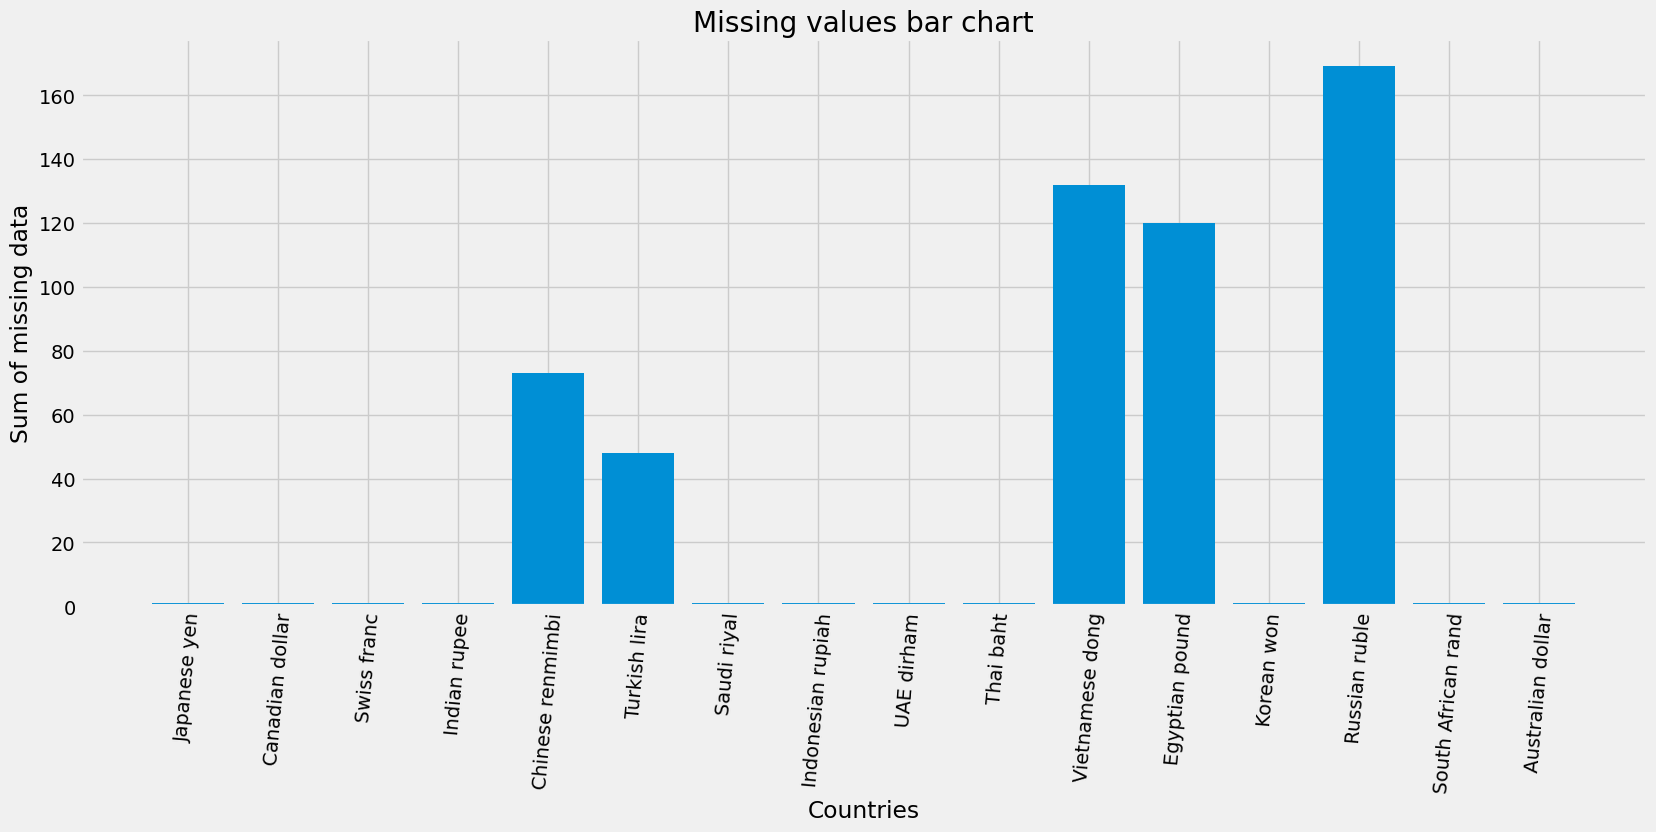

In [11]:
sum_of_missing_monthly = monthly_prices_1.isnull().sum()[missing_monthly_data]
# https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
# https://stackabuse.com/rotate-axis-labels-in-matplotlib/
plt.bar(missing_monthly_data, sum_of_missing_monthly)
ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 85)
#
plt.xlabel('Countries')
plt.ylabel('Sum of missing data')
plt.title('Missing values bar chart');

### Remove NA data from Monthly database

In [12]:
for i in range(0,len(monthly_prices_1)):
    if monthly_prices_1.loc[i].isnull().any()==True:
        monthly_prices_1=monthly_prices_1.drop([i],axis=0)
    else:
        pass

monthly_prices_1=monthly_prices_1.reset_index().drop(['index'],axis=1)

### Exchange rates loaded and merged

In [13]:
all_exch_rate = pd.read_excel('INR VS USD - EUR - JPY.xlsx', sheet_name=['INR VS USA','INR VS EUR','INR VS JPY'])
usd=all_exch_rate.get('INR VS USA')
eur=all_exch_rate.get('INR VS EUR')
jpy=all_exch_rate.get('INR VS JPY')

In [14]:
merged_all_rates=usd.merge(eur, how='left', left_on='Date', right_on='Date', suffixes=('_usd','_eur'))
merged_all_rates=merged_all_rates.merge(jpy, how='left', left_on='Date', right_on='Date', suffixes=('_11','_jpy'))
merged_all_rates=merged_all_rates.drop(['Open_usd', 'High_usd', 'Low_usd', 'Volume_usd','Chg%_usd','Open_eur', 'High_eur', 'Low_eur','Volume_eur', 'Chg%_eur','Open', 'High', 'Low', 'Volume','Chg%'],axis=1)
merged_all_rates.rename(columns={'Price':'Price_jpy'},inplace=True)

In [15]:
monthly_prices_1.head(2)

,US dollar,Euro,Japanese yen,Pound sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,Turkish lira,Saudi riyal,Indonesian rupiah,UAE dirham,Thai baht,Vietnamese dong,Egyptian pound,Korean won,Russian ruble,South African rand,Australian dollar,New_EndOfMonth
0,330.45,264.28,41222.92,222.23,419.45,491.12,9642.39,1953.90,2.92,1243.18,697207.38,1217.51,8426.81,3586616.50,1103.09,266748.94,168.99,1017.39,489.12,1993-01-31
1,327.60,270.45,38676.62,230.22,409.21,500.15,9885.56,1929.13,3.01,1227.06,683127.01,1201.74,8356.91,3522924.45,1093.51,262379.44,184.61,1027.39,471.03,1993-02-28


In [16]:
monthly_prices_1=monthly_prices_1.merge(merged_all_rates, how='left', left_on='New_EndOfMonth', right_on='Date')
monthly_prices_1=monthly_prices_1.drop(['Date'],axis=1)

### Average rates per year converted from USD, EUR & JPY to INR currency

In [17]:
monthly_prices_1['EUR gold price in INR']=monthly_prices_1['Euro']*monthly_prices_1['Price_eur']
monthly_prices_1['JPY gold price in INR']=monthly_prices_1['Japanese yen']*monthly_prices_1['Price_jpy']
monthly_prices_1['USA gold price in INR']=monthly_prices_1['US dollar']*monthly_prices_1['Price_usd']
monthly_prices_1.head(2)

,US dollar,Euro,Japanese yen,Pound sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,Turkish lira,Saudi riyal,...,Russian ruble,South African rand,Australian dollar,New_EndOfMonth,Price_usd,Price_eur,Price_jpy,EUR gold price in INR,JPY gold price in INR,USA gold price in INR
0,330.45,264.28,41222.92,222.23,419.45,491.12,9642.39,1953.90,2.92,1243.18,...,168.99,1017.39,489.12,1993-01-31,31.377,37.9985,0.2517,10042.24358,10375.808964,10368.52965
1,327.60,270.45,38676.62,230.22,409.21,500.15,9885.56,1929.13,3.01,1227.06,...,184.61,1027.39,471.03,1993-02-28,32.868,38.7180,0.2781,10471.28310,10755.968022,10767.55680


In [18]:
monthly_prices_U_E_J=monthly_prices_1[['New_EndOfMonth','EUR gold price in INR','JPY gold price in INR','USA gold price in INR','Indian rupee']]
monthly_prices_U_E_J.head(2)

,New_EndOfMonth,EUR gold price in INR,JPY gold price in INR,USA gold price in INR,Indian rupee
0,1993-01-31,10042.24358,10375.808964,10368.52965,9642.39
1,1993-02-28,10471.28310,10755.968022,10767.55680,9885.56


In [19]:
monthly_prices_U_E_J_2020 = monthly_prices_U_E_J[(monthly_prices_U_E_J['New_EndOfMonth'] > start_date) & (monthly_prices_U_E_J['New_EndOfMonth'] < end_date)].reset_index()
monthly_prices_U_E_J_2020=monthly_prices_U_E_J_2020.drop(['index'],axis=1)

In [20]:
monthly_prices_U_E_J_2020.head(2)

,New_EndOfMonth,EUR gold price in INR,JPY gold price in INR,USA gold price in INR,Indian rupee
0,2011-01-31,65688.90900,63642.330981,64407.0375,62846.93
1,2011-02-28,60449.85114,60177.128850,60066.6550,60922.55


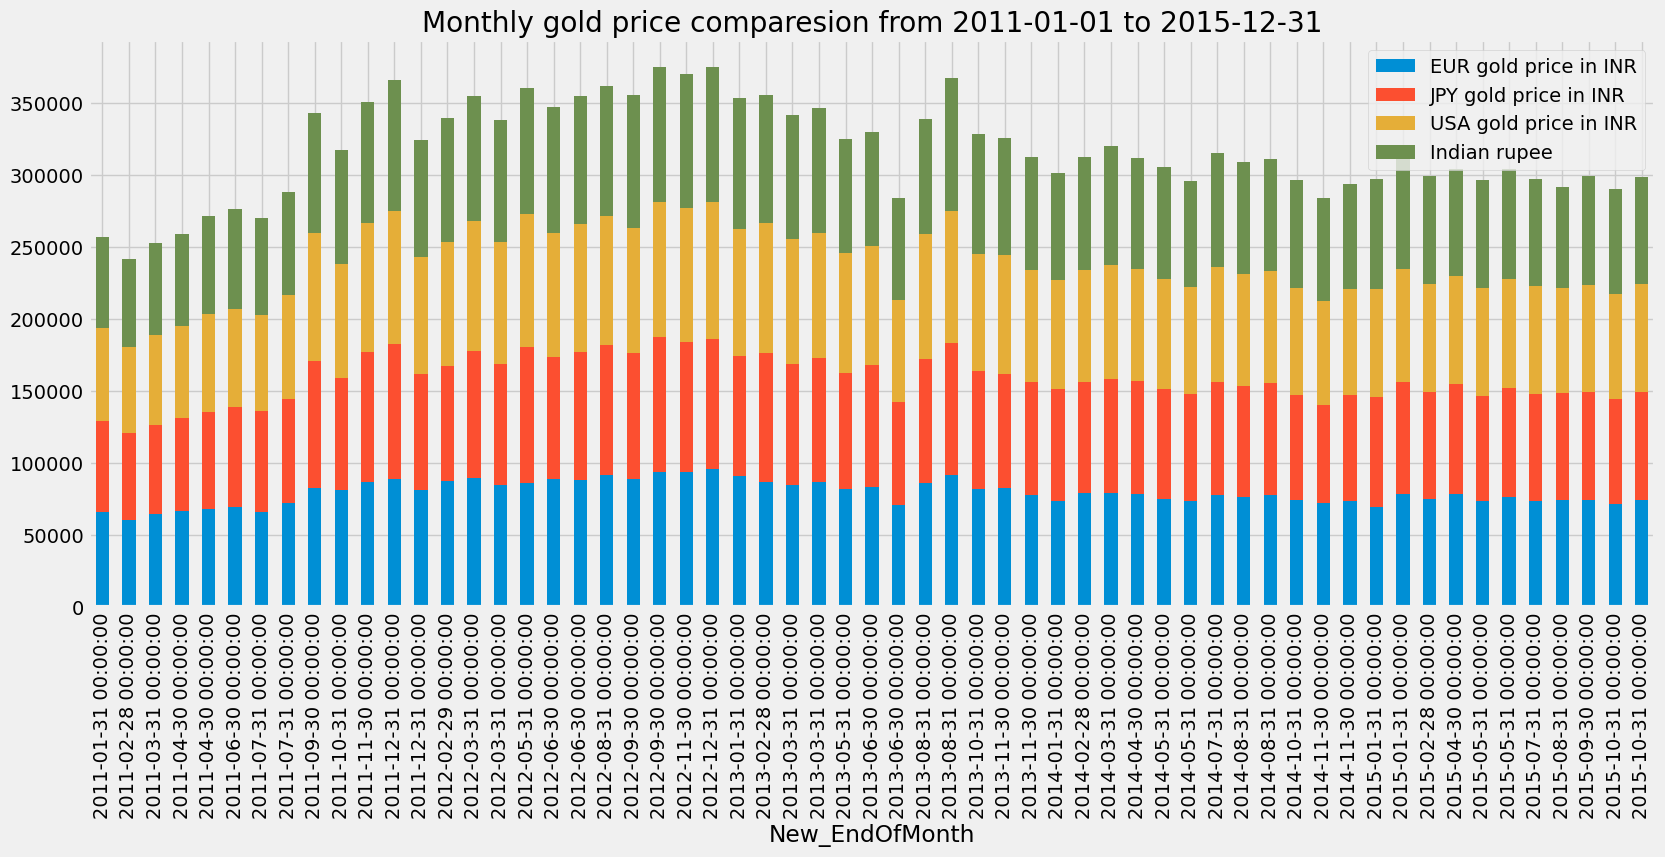

In [21]:
monthly_prices_U_E_J_2020.plot(x='New_EndOfMonth',kind='bar',stacked=True,title='Monthly gold price comparesion from '+start_date+' to '+end_date);

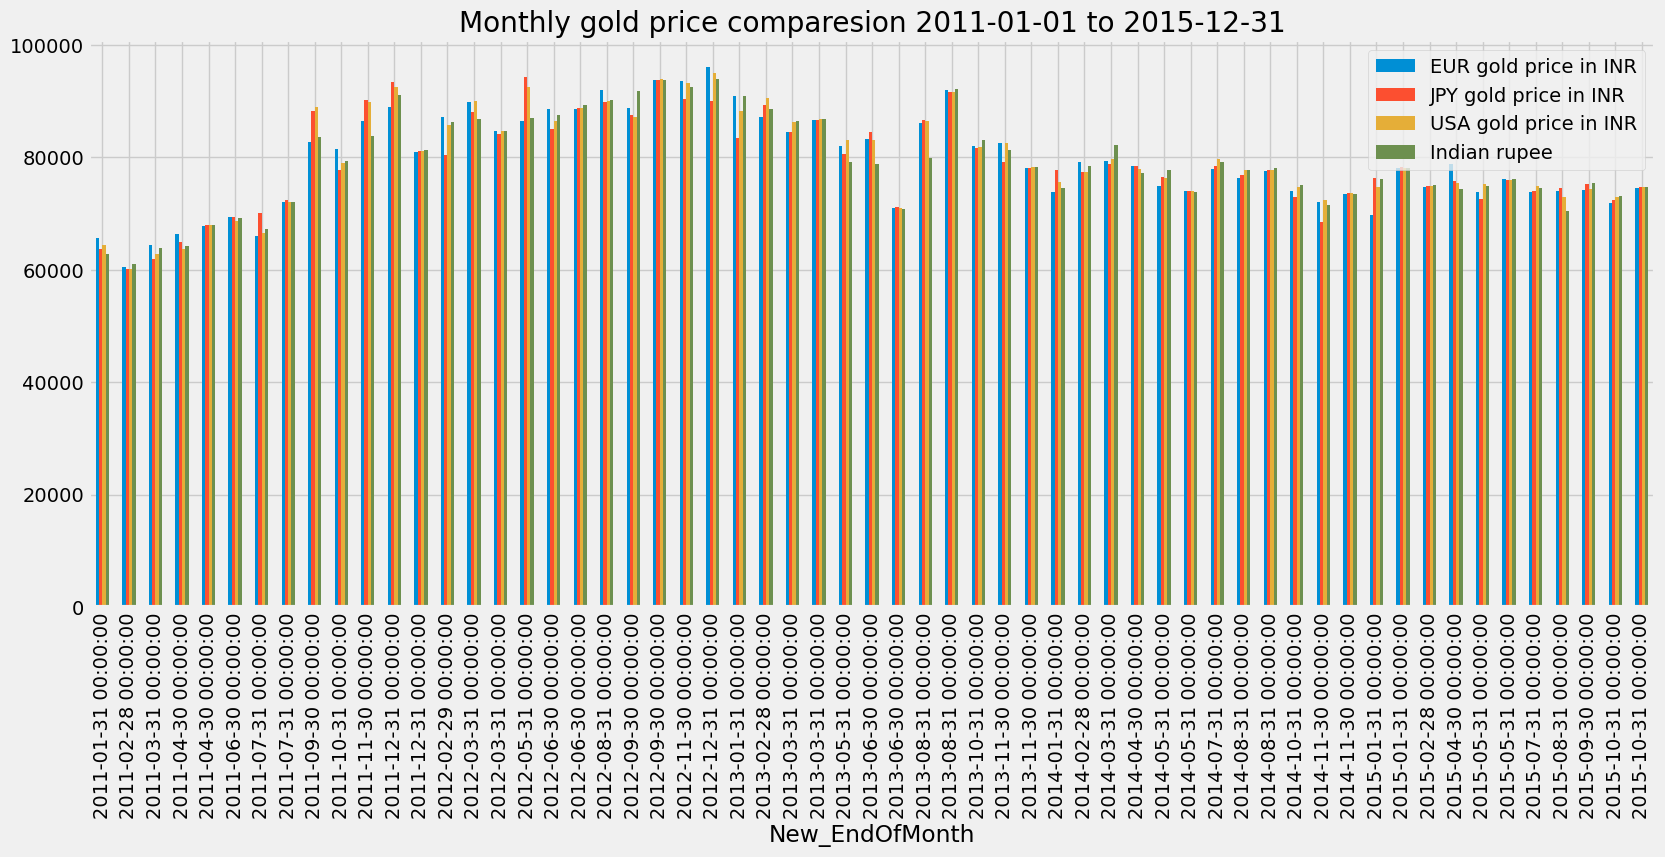

In [22]:
monthly_prices_U_E_J_2020.plot(x='New_EndOfMonth',kind='bar',stacked=False,title='Monthly gold price comparesion '+start_date+' to '+end_date);

### Compute monthly returns

In [23]:
def compute_monthly_returns(df):
    """Compute and return the monthly return values."""
    monthly_return = (df / df.shift(1)) - 1
    monthly_return[0] = 0
    return monthly_return

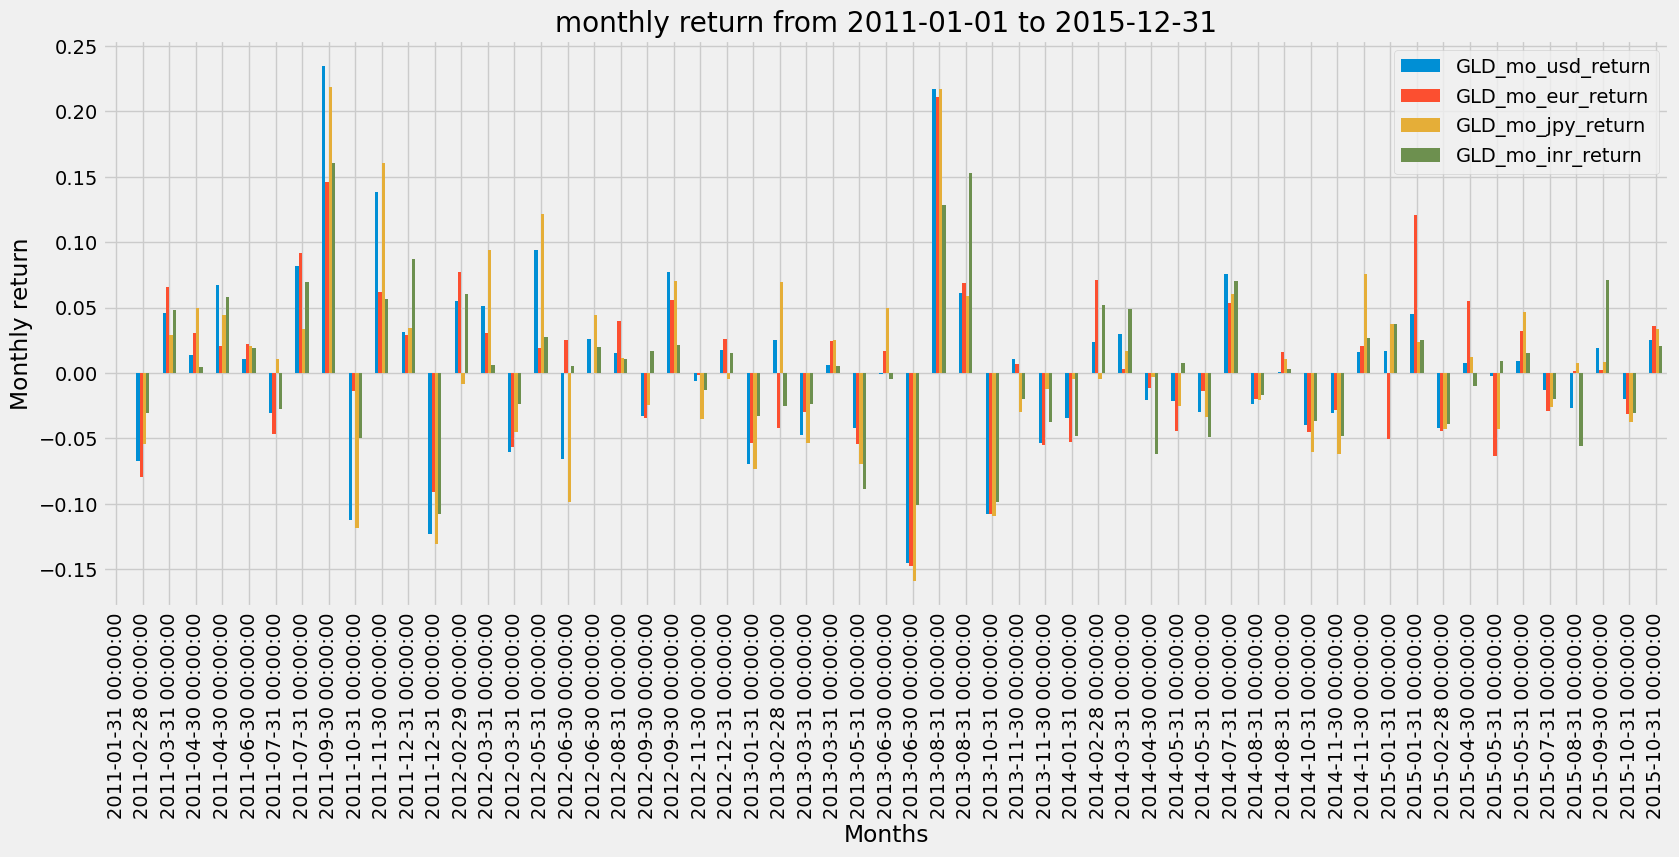

In [24]:
GLD_mo_usd_return = compute_monthly_returns(monthly_prices_U_E_J_2020['USA gold price in INR'])
GLD_mo_eur_return = compute_monthly_returns(monthly_prices_U_E_J_2020['EUR gold price in INR'])
GLD_mo_jpy_return = compute_monthly_returns(monthly_prices_U_E_J_2020['JPY gold price in INR'])
GLD_mo_inr_return = compute_monthly_returns(monthly_prices_U_E_J_2020['Indian rupee'])

df_d = pd.DataFrame({'New_EndOfMonth':monthly_prices_U_E_J_2020['New_EndOfMonth'],'GLD_mo_usd_return':GLD_mo_usd_return, 'GLD_mo_eur_return':GLD_mo_eur_return, 'GLD_mo_jpy_return':GLD_mo_jpy_return, 'GLD_mo_inr_return':GLD_mo_inr_return})

df_d.plot(x='New_EndOfMonth',kind='bar',title='monthly return from '+start_date+' to '+end_date)
plt.ylabel('Monthly return')
plt.xlabel('Months')
plt.show()

True


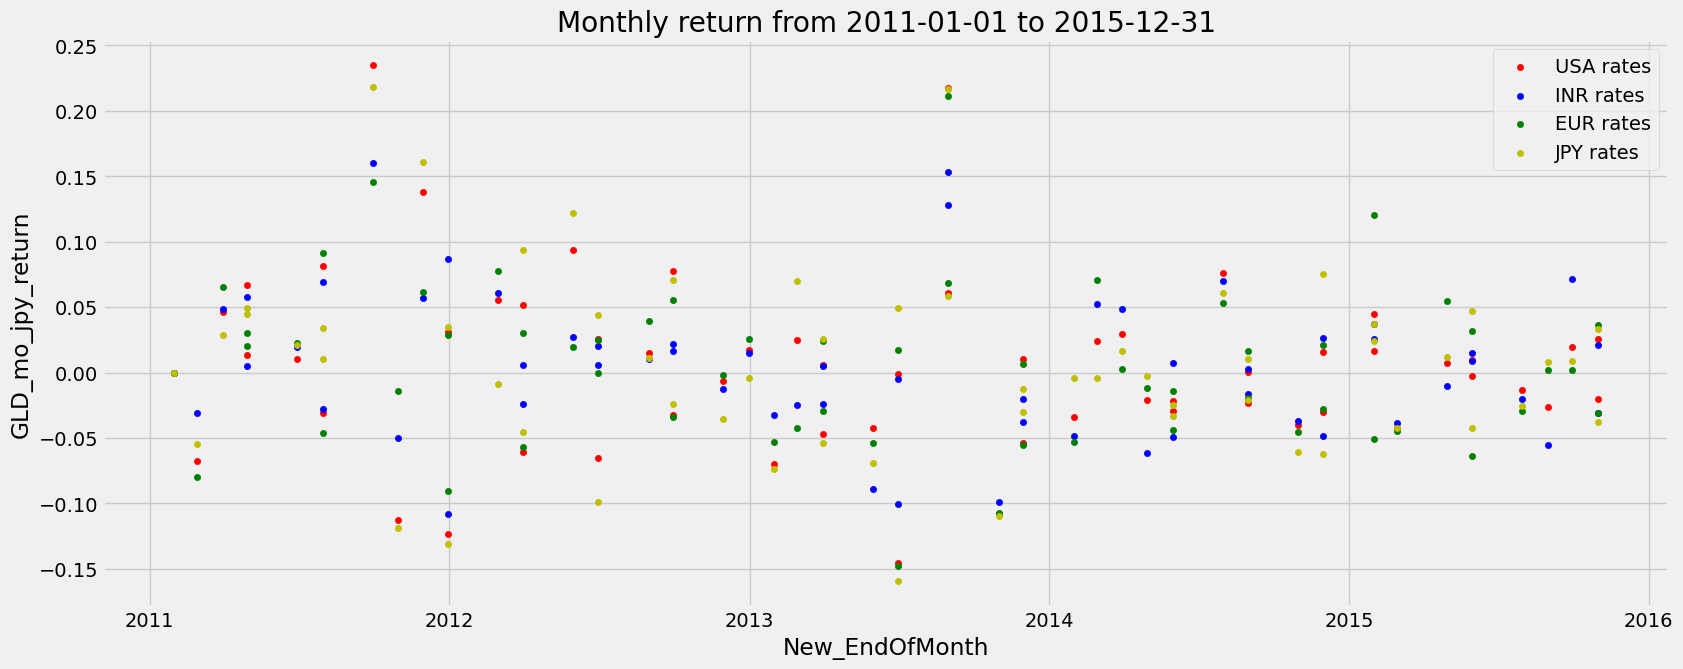

In [25]:
ax1=df_d.plot(kind='scatter',x='New_EndOfMonth',y='GLD_mo_usd_return',color='r', label='USA rates')
ax2=df_d.plot(kind='scatter',x='New_EndOfMonth',y='GLD_mo_inr_return',color='b', 
              title='Monthly return from '+start_date+' to '+end_date, ax=ax1, label='INR rates')
ax3=df_d.plot(kind='scatter',x='New_EndOfMonth',y='GLD_mo_eur_return',color='g',ax=ax2,label='EUR rates')
ax4=df_d.plot(kind='scatter',x='New_EndOfMonth',y='GLD_mo_jpy_return',color='y',ax=ax3,label='JPY rates')
print(ax1==ax2==ax3==ax4);

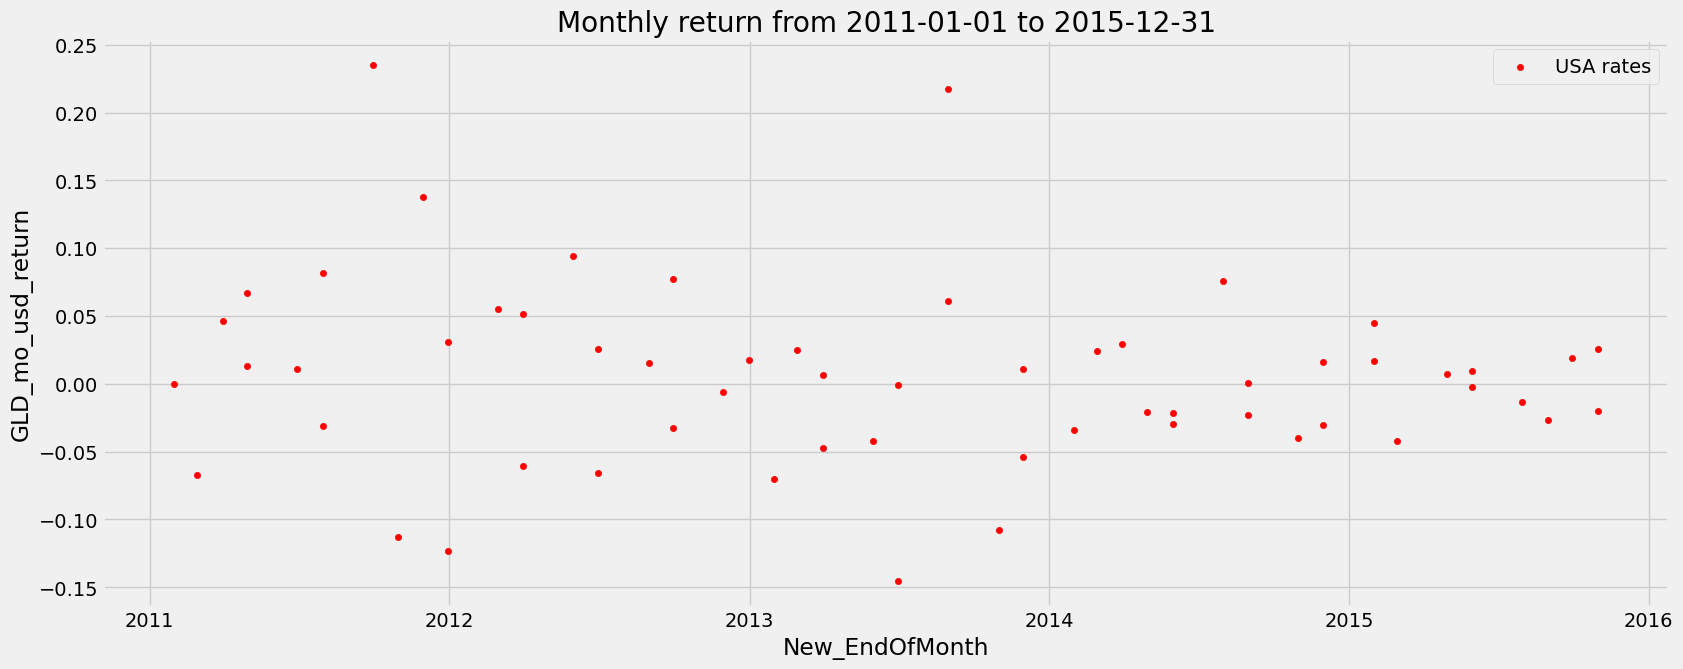

In [26]:
ax1=df_d.plot(kind='scatter',x='New_EndOfMonth',y='GLD_mo_usd_return',color='r',
              title='Monthly return from '+start_date+' to '+end_date,label='USA rates')
ax1;

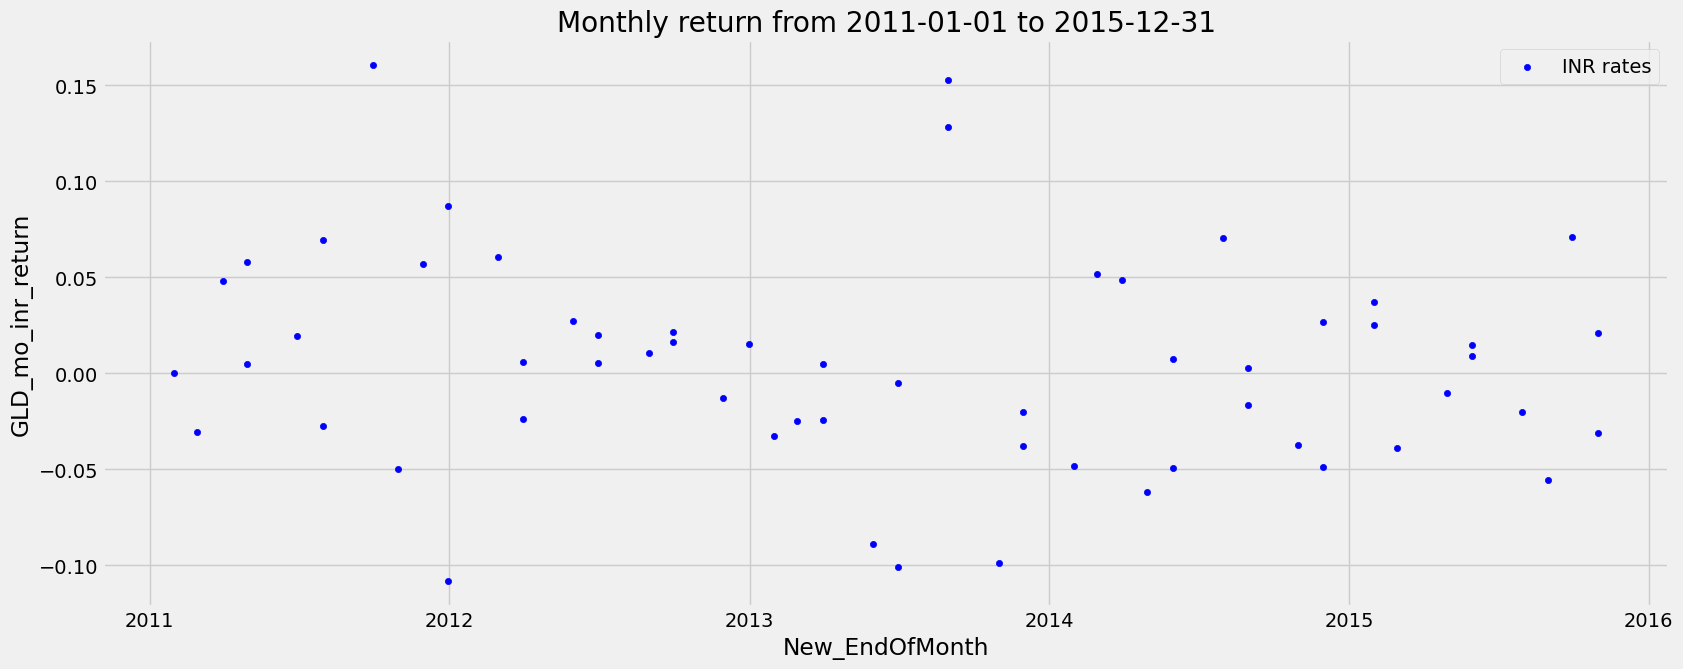

In [27]:
ax2=df_d.plot(kind='scatter',x='New_EndOfMonth',y='GLD_mo_inr_return',color='b', 
              title='Monthly return from '+start_date+' to '+end_date,label='INR rates')
ax2;

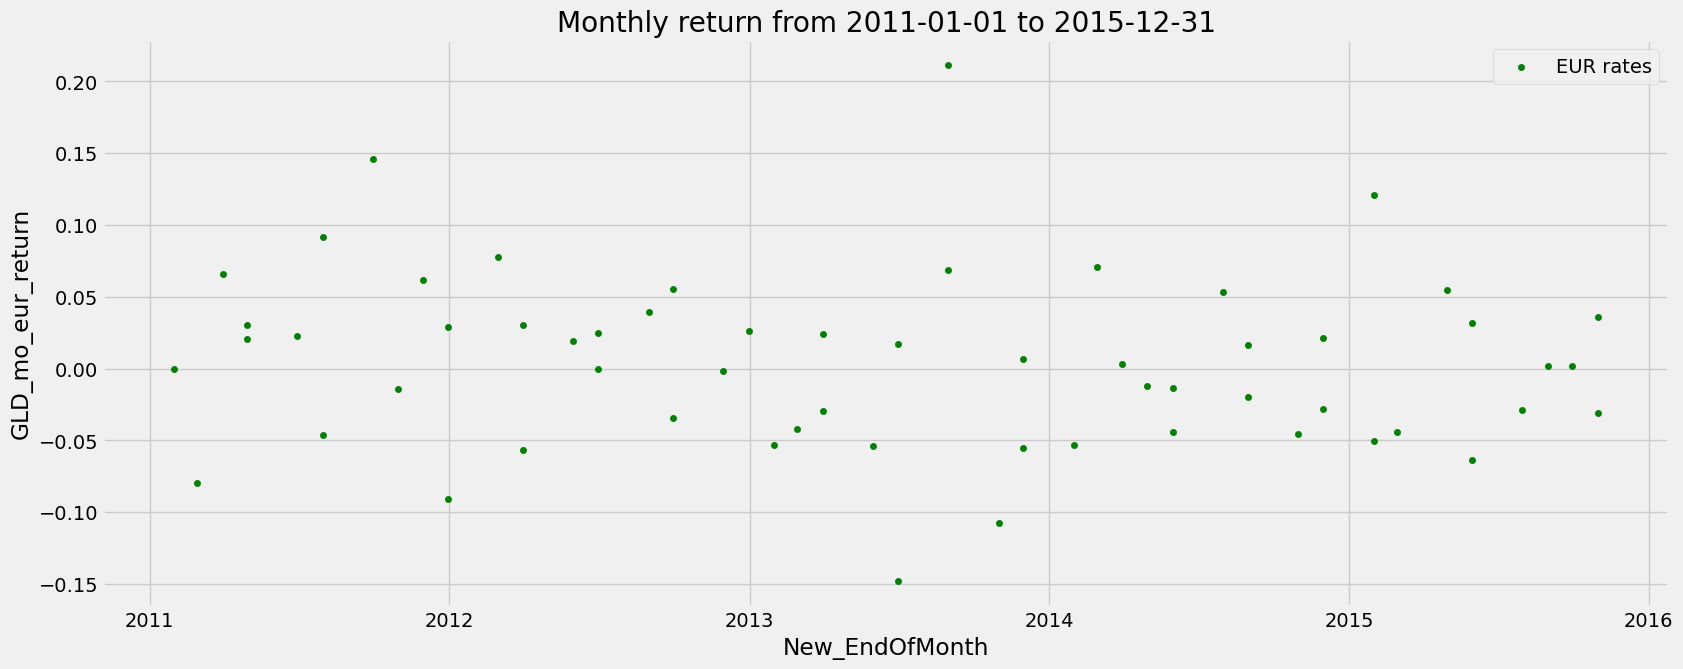

In [28]:
ax3=df_d.plot(kind='scatter',x='New_EndOfMonth',y='GLD_mo_eur_return',color='g',
              title='Monthly return from '+start_date+' to '+end_date,label='EUR rates')
ax3;

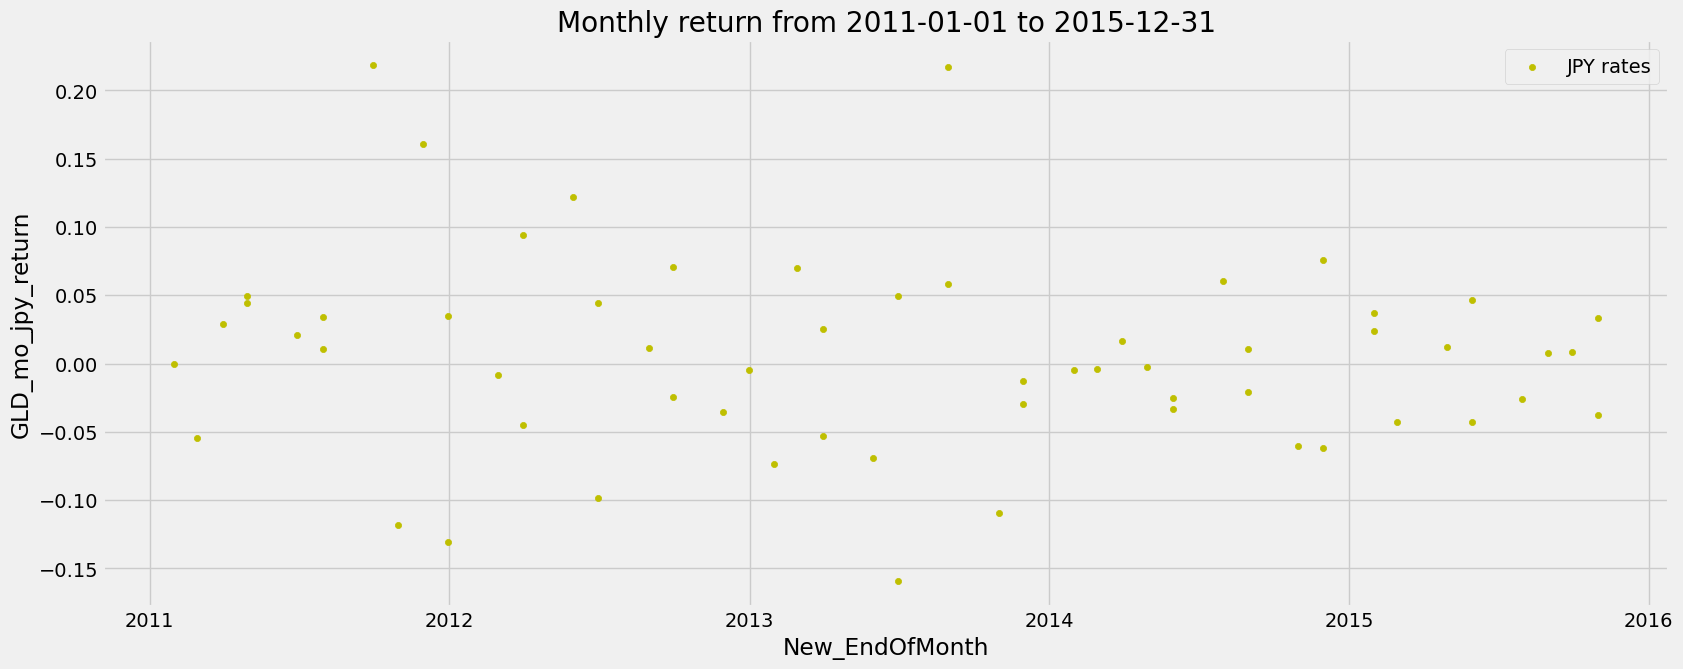

In [29]:
ax4=df_d.plot(kind='scatter',x='New_EndOfMonth',y='GLD_mo_jpy_return',color='y',
              title='Monthly return from '+start_date+' to '+end_date,label='JPY rates')
ax4;

### Statistical Measures (Mean, Standard deviation, Kurtosis)

In [30]:
mean=df_d['GLD_mo_inr_return'].mean()
std=df_d['GLD_mo_inr_return'].std()
kurt=df_d['GLD_mo_inr_return'].kurtosis()
print('mean - ',mean)
print('std - ',std)
print('kurtosis - ',kurt)

mean -  0.004400730320673704
std -  0.05539905535821558
kurtosis -  0.9281948812755973


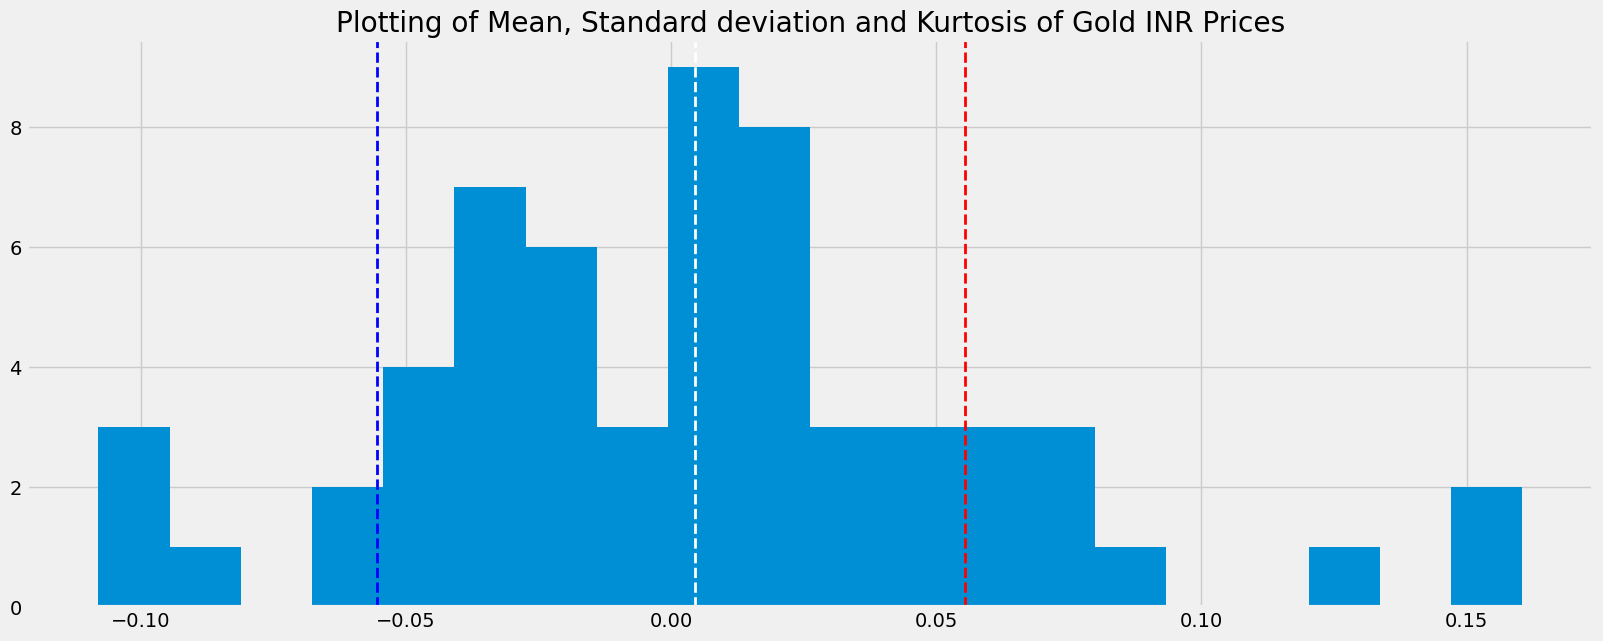

In [31]:
df_d['GLD_mo_inr_return'].hist(bins=20)
plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='b',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Gold INR Prices")
plt.show()

mean -  0.00471324393179954
std -  0.06794599720962953
kurtosis -  2.7764590980398727


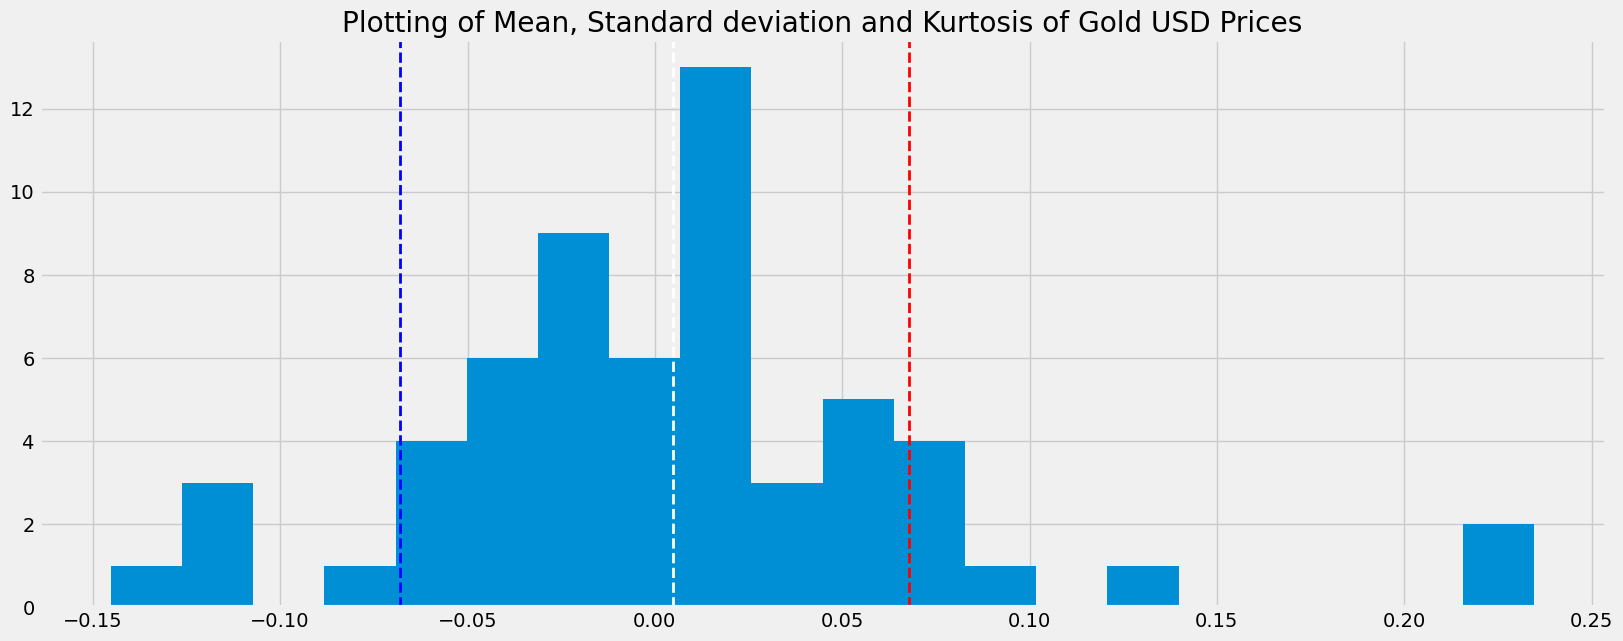

In [32]:
mean_usd=df_d['GLD_mo_usd_return'].mean()
std_usd=df_d['GLD_mo_usd_return'].std()
kurt_usd=df_d['GLD_mo_usd_return'].kurtosis()
print('mean - ',mean_usd)
print('std - ',std_usd)
print('kurtosis - ',kurt_usd)

df_d['GLD_mo_usd_return'].hist(bins=20)
plt.axvline(mean_usd, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std_usd, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std_usd, color='b',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Gold USD Prices")
plt.show()

mean -  0.0039188048126424894
std -  0.06105747341486411
kurtosis -  1.7173445132527188


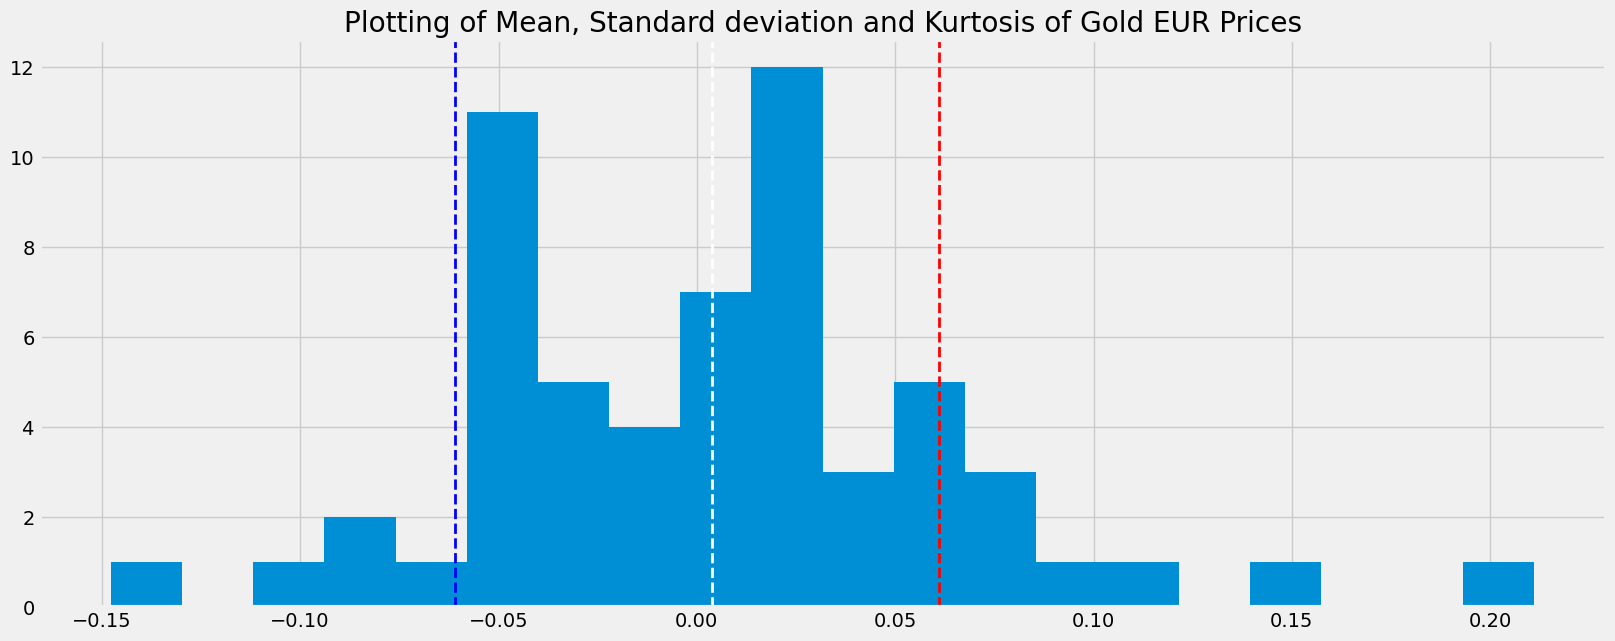

In [33]:
mean_eur=df_d['GLD_mo_eur_return'].mean()
std_eur=df_d['GLD_mo_eur_return'].std()
kurt_eur=df_d['GLD_mo_eur_return'].kurtosis()
print('mean - ',mean_eur)
print('std - ',std_eur)
print('kurtosis - ',kurt_eur)

df_d['GLD_mo_eur_return'].hist(bins=20)
plt.axvline(mean_eur, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std_eur, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std_eur, color='b',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Gold EUR Prices")
plt.show()

mean -  0.0052085897023008264
std -  0.0718150003887518
kurtosis -  1.697501299652632


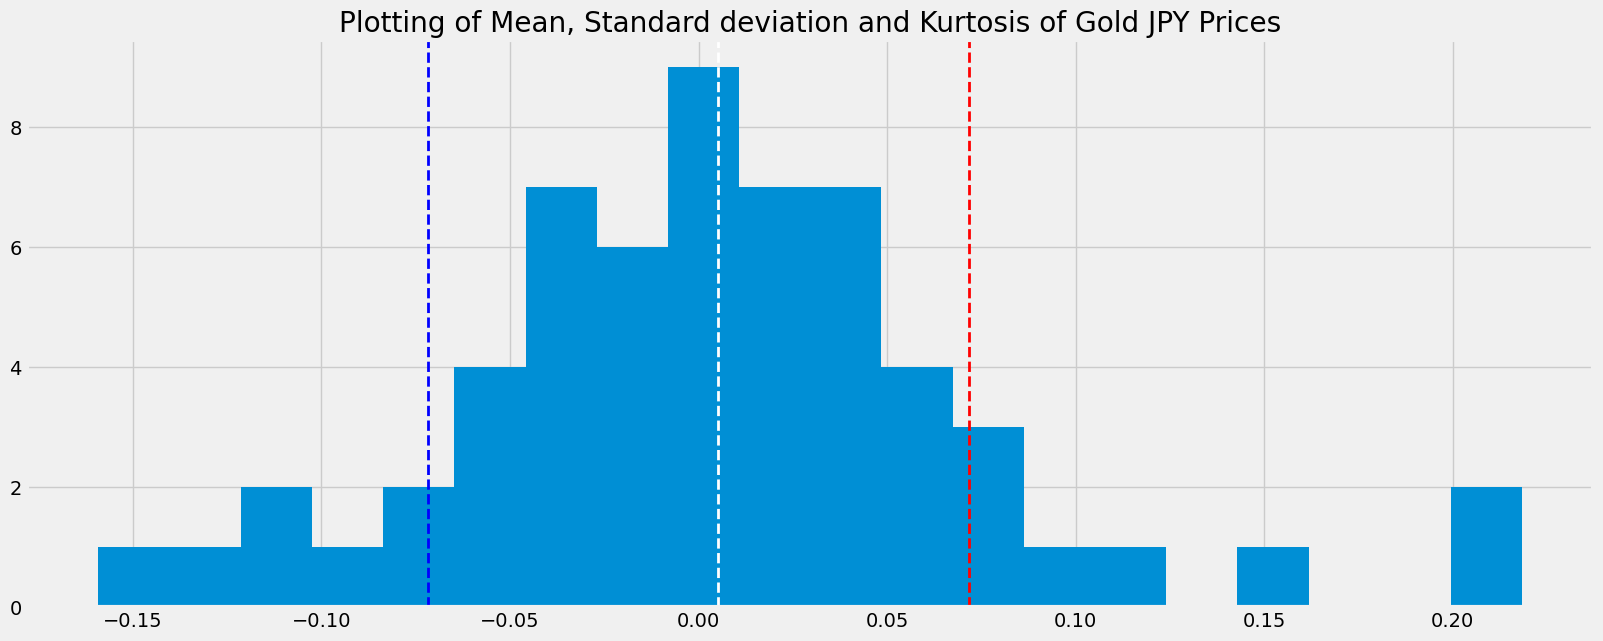

In [34]:
mean_jpy=df_d['GLD_mo_jpy_return'].mean()
std_jpy=df_d['GLD_mo_jpy_return'].std()
kurt_jpy=df_d['GLD_mo_jpy_return'].kurtosis()
print('mean - ',mean_jpy)
print('std - ',std_jpy)
print('kurtosis - ',kurt_jpy)

df_d['GLD_mo_jpy_return'].hist(bins=20)
plt.axvline(mean_jpy, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std_jpy, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std_jpy, color='b',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Gold JPY Prices")
plt.show()

# Correlation Analysis

### Plotting Correlation Matrix

In [35]:
monthly_prices_1_2=monthly_prices_1[['New_EndOfMonth','EUR gold price in INR','JPY gold price in INR','USA gold price in INR','Indian rupee']]
monthly_prices_1_2.head(2)

,New_EndOfMonth,EUR gold price in INR,JPY gold price in INR,USA gold price in INR,Indian rupee
0,1993-01-31,10042.24358,10375.808964,10368.52965,9642.39
1,1993-02-28,10471.28310,10755.968022,10767.55680,9885.56


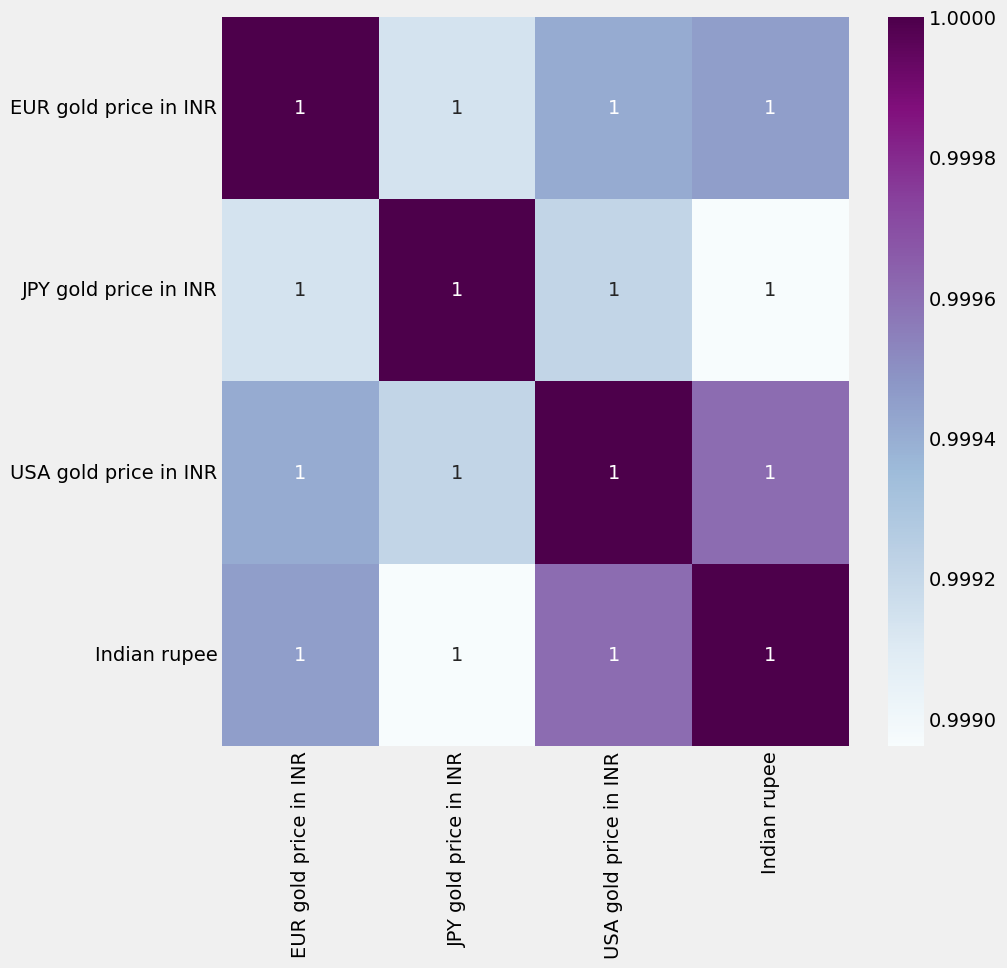

In [36]:
plt.figure(figsize=(9,9))
sns.heatmap(monthly_prices_1_2.corr(), annot=True, cmap='BuPu');

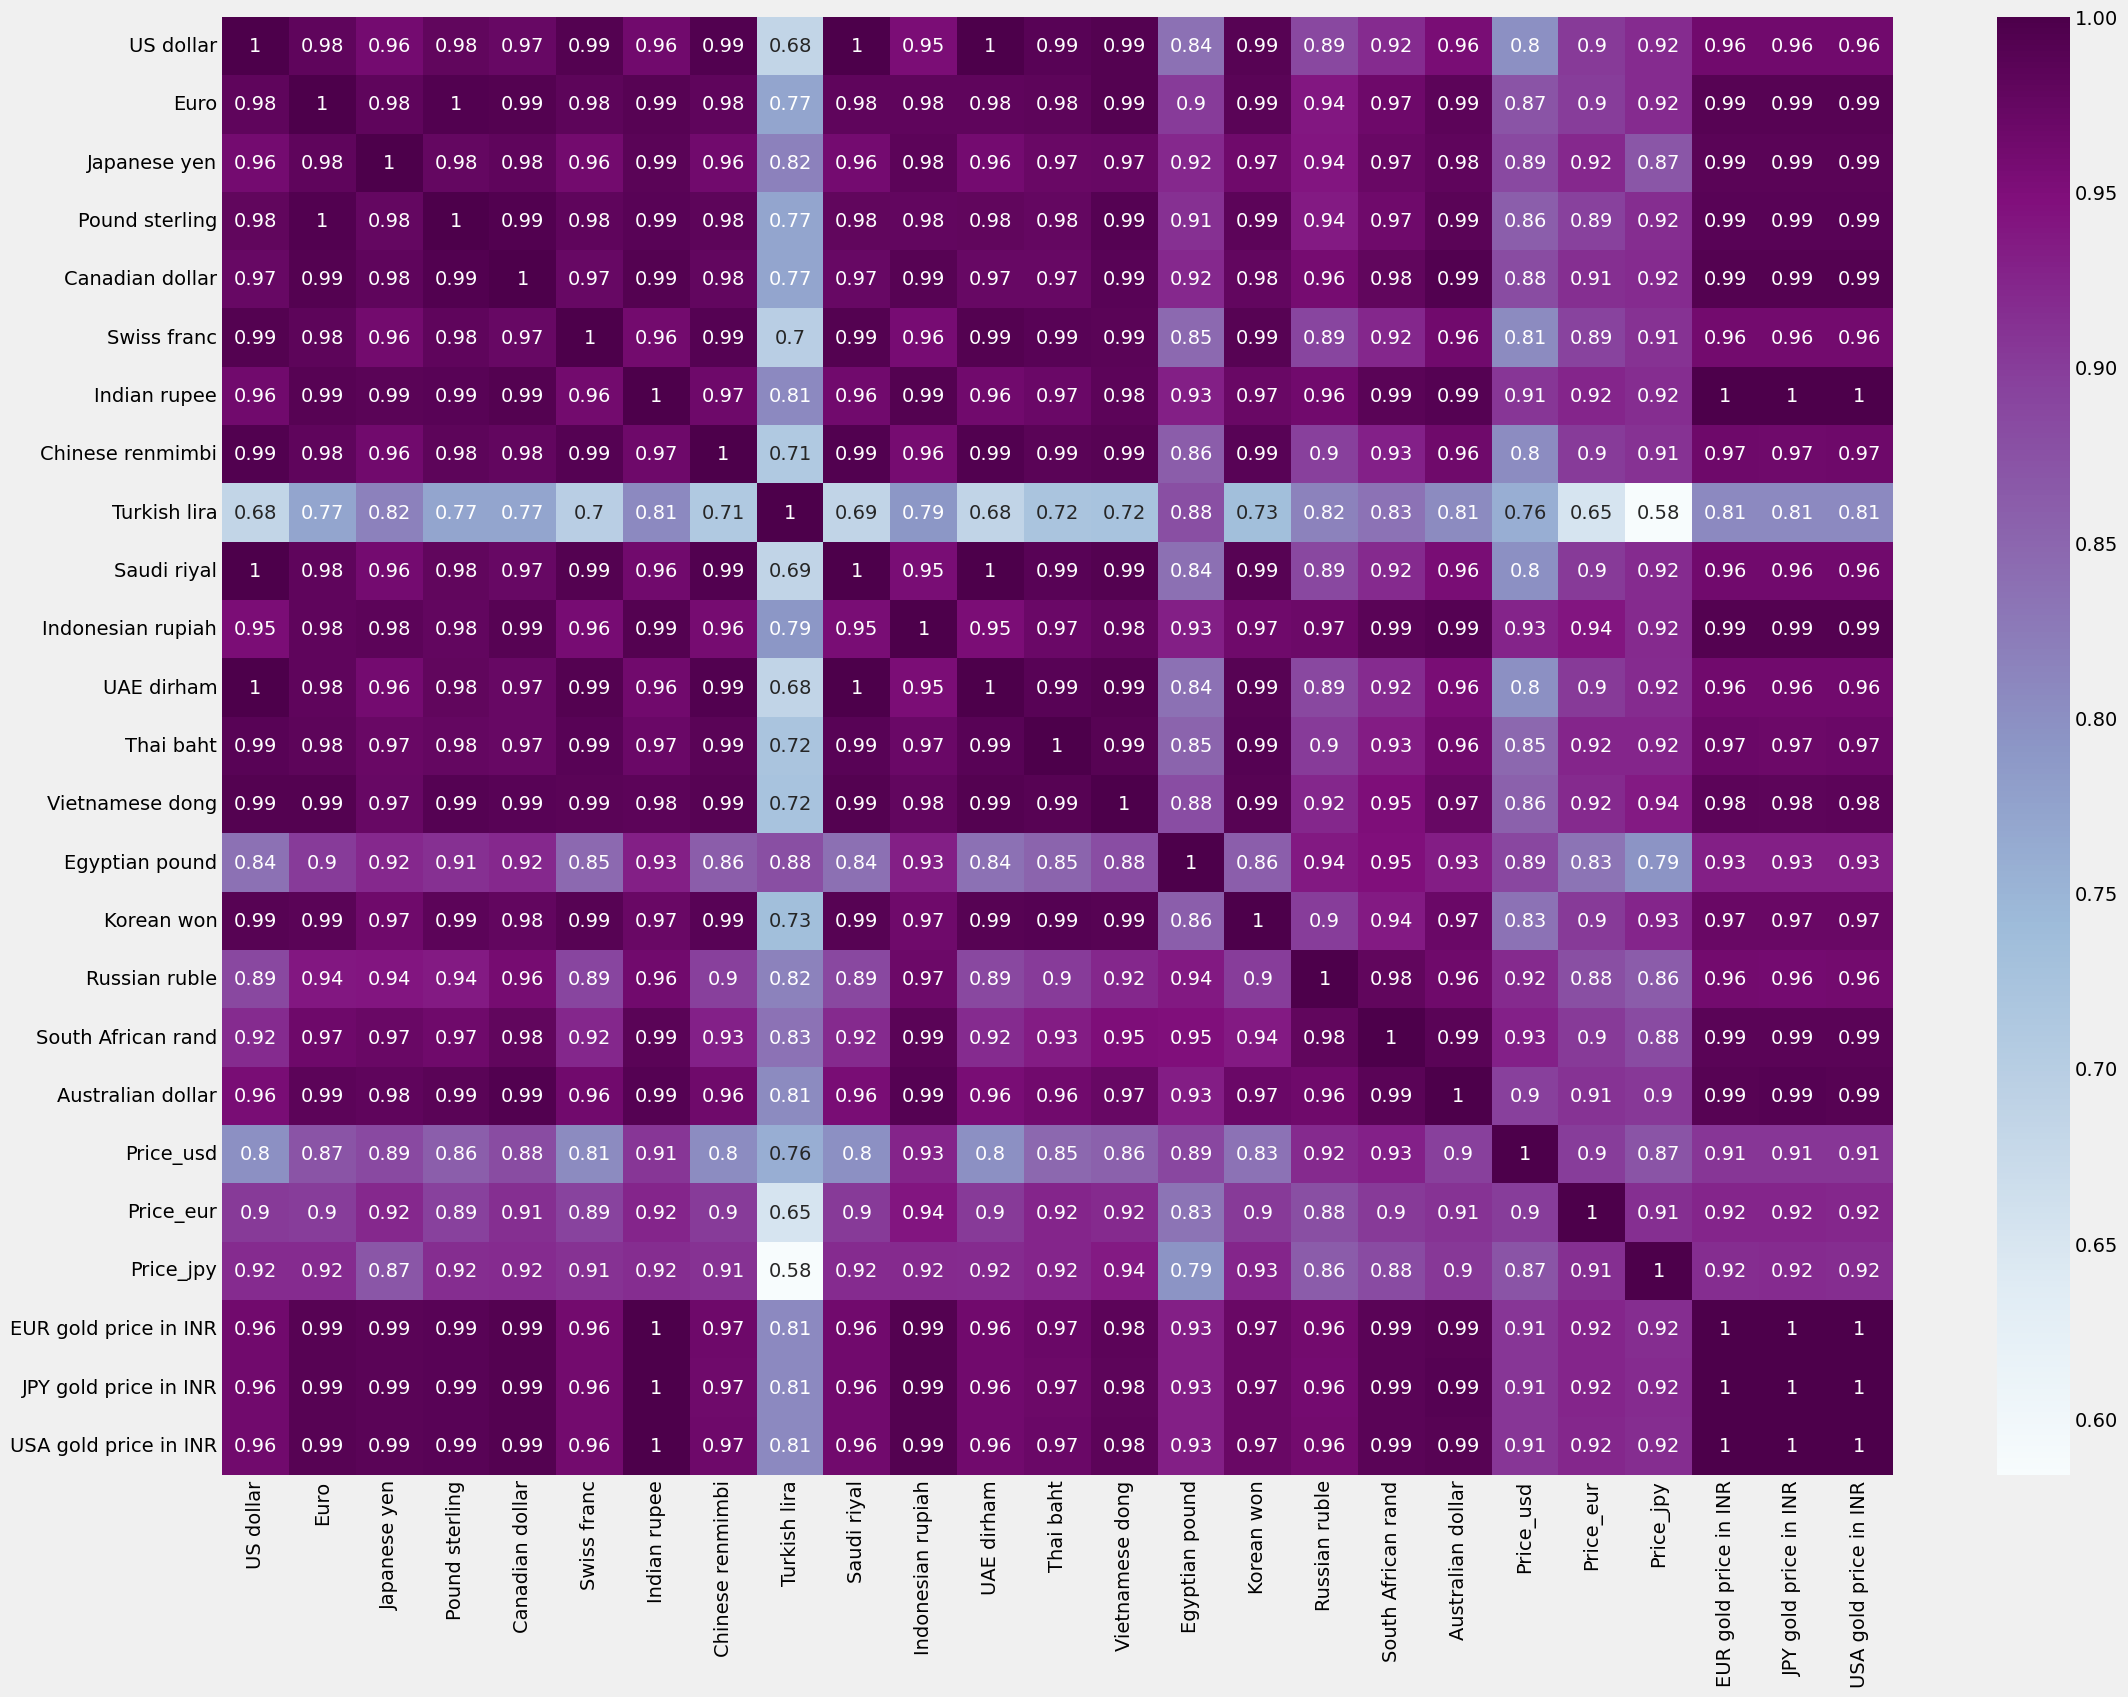

In [37]:
plt.figure(figsize=(24,18))
sns.heatmap(monthly_prices_1.corr(), annot=True, cmap='BuPu');

In [38]:
x=monthly_prices_1.drop(['Indian rupee'],axis=1)

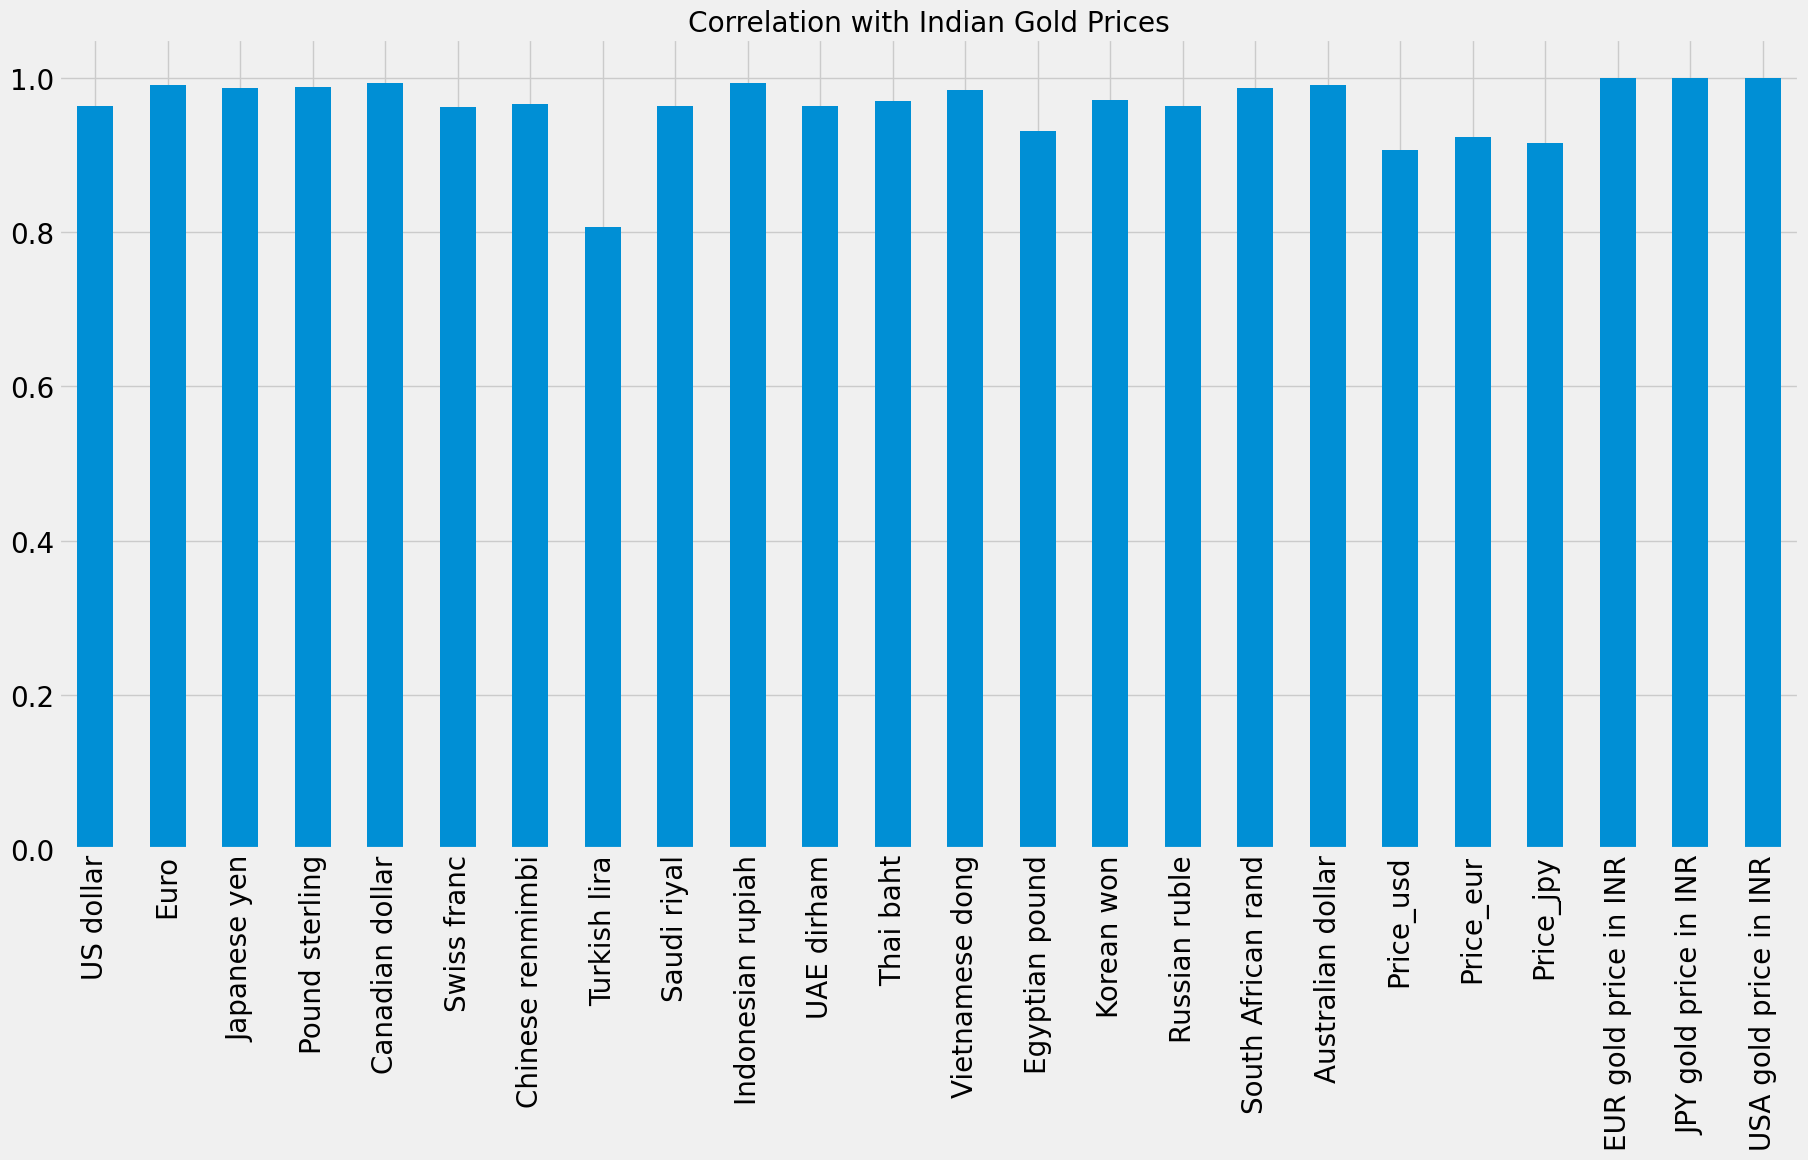

In [39]:
x.corrwith(monthly_prices_1['Indian rupee']).plot.bar(
        figsize = (20, 10), title = "Correlation with Indian Gold Prices", fontsize = 20,
        rot = 90, grid = True);

### Positively Correlated Variables

In [40]:
corr_matrix=monthly_prices_1.corr()
corr_matrix.head(2)

,US dollar,Euro,Japanese yen,Pound sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,Turkish lira,Saudi riyal,...,Korean won,Russian ruble,South African rand,Australian dollar,Price_usd,Price_eur,Price_jpy,EUR gold price in INR,JPY gold price in INR,USA gold price in INR
US dollar,1.000000,0.980968,0.959464,0.979770,0.973463,0.993230,0.963783,0.994015,0.684745,0.999999,...,0.988941,0.886302,0.918591,0.955443,0.798569,0.902849,0.917939,0.963252,0.962911,0.963979
Euro,0.980968,1.000000,0.982003,0.995022,0.992931,0.982951,0.989879,0.981808,0.770912,0.981076,...,0.986656,0.938662,0.966655,0.985271,0.872532,0.899252,0.918261,0.990030,0.989048,0.989784


In [41]:
coef=corr_matrix["Indian rupee"].sort_values(ascending=False)
coef

Indian rupee             1.000000
USA gold price in INR    0.999607
EUR gold price in INR    0.999452
JPY gold price in INR    0.998961
Canadian dollar          0.993306
Indonesian rupiah        0.993113
Australian dollar        0.990393
Euro                     0.989879
Pound sterling           0.987706
South African rand       0.986395
Japanese yen             0.985971
Vietnamese dong          0.984100
Korean won               0.971268
Thai baht                0.969710
Chinese renmimbi         0.966272
Saudi riyal              0.963915
UAE dirham               0.963794
US dollar                0.963783
Russian ruble            0.963001
Swiss franc              0.962549
Egyptian pound           0.930724
Price_eur                0.923672
Price_jpy                0.915831
Price_usd                0.906424
Turkish lira             0.806967
Name: Indian rupee, dtype: float64

In [42]:
pos_corr=coef[coef>0]
pos_corr

Indian rupee             1.000000
USA gold price in INR    0.999607
EUR gold price in INR    0.999452
JPY gold price in INR    0.998961
Canadian dollar          0.993306
Indonesian rupiah        0.993113
Australian dollar        0.990393
Euro                     0.989879
Pound sterling           0.987706
South African rand       0.986395
Japanese yen             0.985971
Vietnamese dong          0.984100
Korean won               0.971268
Thai baht                0.969710
Chinese renmimbi         0.966272
Saudi riyal              0.963915
UAE dirham               0.963794
US dollar                0.963783
Russian ruble            0.963001
Swiss franc              0.962549
Egyptian pound           0.930724
Price_eur                0.923672
Price_jpy                0.915831
Price_usd                0.906424
Turkish lira             0.806967
Name: Indian rupee, dtype: float64

### Negatively Correlated Variables

In [43]:
neg_corr=coef[coef<0]
neg_corr
# No Negative Correlations.....

Series([], Name: Indian rupee, dtype: float64)